In [10]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
netflix_tittles=pd.read_csv('netflix_titles.csv')

In [4]:
netflix_tittles.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [5]:
netflix_shows=netflix_tittles[netflix_tittles['type']=='TV Show']
netflix_movies=netflix_tittles[netflix_tittles['type']=='Movie']

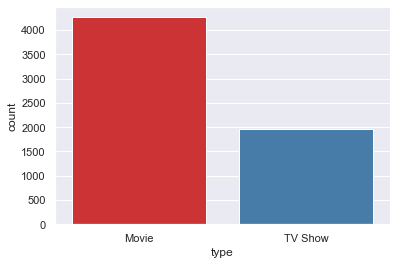

In [9]:
#Which content type is more prevalent
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=netflix_tittles, palette="Set1")

# Explore the data through visualizations 

In [23]:
from collections import Counter

years = list(range(2008,2020,1))

#separate movies and tv_shows:
movie_rows = netflix_tittles.loc[netflix_tittles["type"] == "Movie"]
tv_rows = netflix_tittles.loc[netflix_tittles["type"] == "TV Show"]

#Count movies / tv shows per year
movies_counts = movie_rows.release_year.value_counts()
tv_counts = tv_rows.release_year.value_counts()

index_years_mov = movies_counts.index.isin(years)
index_years_tv = tv_counts.index.isin(years)

#select movies / tv shows between chosen years:
movies = movies_counts[index_years_mov]
tv_shows = tv_counts[index_years_tv]

# Calculate percentages of movies and tv shows:
movies_percentage = round(movie_rows.shape[0] / netflix_tittles["type"].shape[0] * 100, 2)
tvshows_percentage = round(tv_rows.shape[0] / netflix_tittles["type"].shape[0] * 100, 2)

#Top Movie and TV Show producer country:
top5_producer_countrys = netflix_tittles.country.value_counts().sort_values(ascending=False).head(5)

#Top most common Actors an directors (Movies and tv shows):
casts = ", ".join(netflix_tittles.copy().fillna("")['cast']).split(", ")
counter_list = Counter(casts).most_common(5)
most_common_actors = [i for i in counter_list if i[0] != ""]
labels = [i[0] for i in most_common_actors][::-1]
values = [i[1] for i in most_common_actors][::-1]

most_common_directors = netflix_tittles.director.value_counts().head(5).sort_values(ascending=True)

No handles with labels found to put in legend.


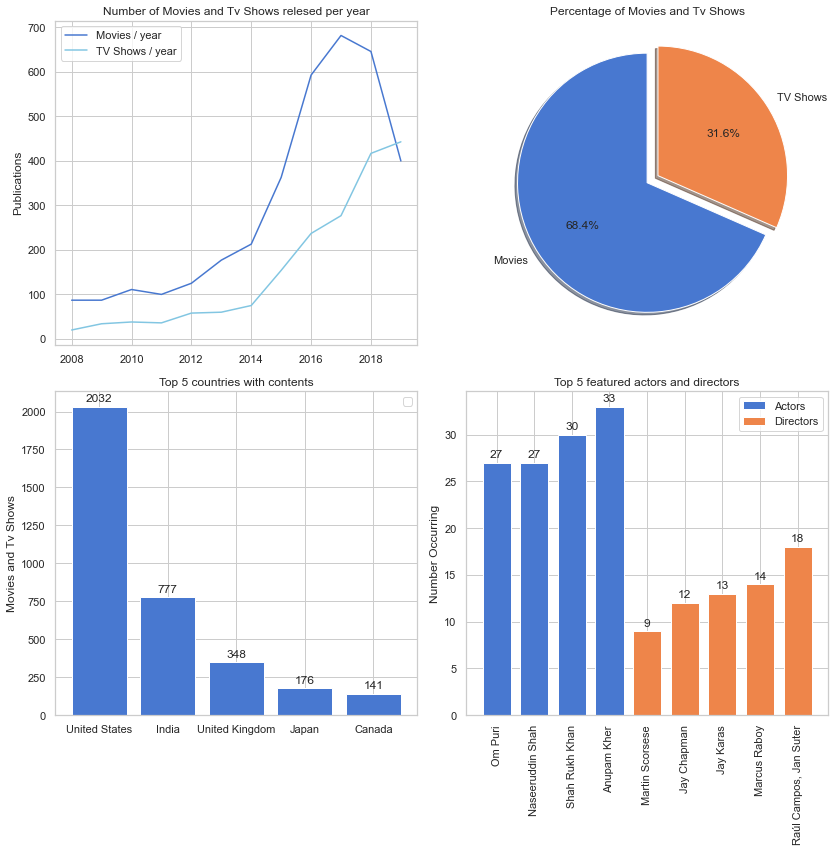

In [37]:
sns.set(style="whitegrid", palette="muted", color_codes=True)
width = 0.75
def autolabel(rects, axes):
    """Helper function to attach a text label above each bar in *rects*, displaying its height.
        Add specific axes[x, y] for subplot labeling"""
    for rect in rects:
        height = rect.get_height()
        axes.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(12, 12), sharex=False)

#Line plot of Movies and TV Shows released by Netflix per year")
sns.lineplot(data=movies, color="b", ax=axes[0, 0], label="Movies / year")
sns.lineplot(data=tv_shows, color="c", ax=axes[0, 0], label="TV Shows / year")

# Pie chart of type percentages
axes[0, 1].pie([movies_per, tvshows_per], explode=(0, 0.1,), labels=["Movies", "TV Shows"], autopct='%1.1f%%',
        shadow=True, startangle=90)

# Bar chart of top 5 Movie / Tv shows producer countrys:
rects1 = axes[1, 0].bar(top5_producer_countrys.index, top5_producer_countrys.values,)

autolabel(rects1, axes[1, 0])

#Bar chart of top 5 most commen actors and directors:
rects2 = axes[1, 1].bar(labels, values, width, label='Actors',)

rects3 = axes[1, 1].bar(most_common_directors.index, most_common_directors.values, width, label='Directors')

autolabel(rects2, axes[1, 1])
autolabel(rects3, axes[1, 1])

axes[0, 0].set_ylabel('Publications')
axes[0, 0].set_title('Number of Movies and Tv Shows relesed per year')

axes[0, 1].set_title('Percentage of Movies and Tv Shows')

axes[1, 0].set_ylabel('Movies and Tv Shows')
axes[1, 0].set_title('Top 5 countries with contents')
axes[1, 0].legend()

axes[1, 1].set_ylabel('Number Occurring')
axes[1, 1].set_xticklabels(labels + list(most_common_directors.index), rotation="vertical")
axes[1, 1].set_title('Top 5 featured actors and directors')
axes[1, 1].legend()

plt.tight_layout()
plt.savefig('output.png')
plt.show()



#movie 'rating' category with highest content 

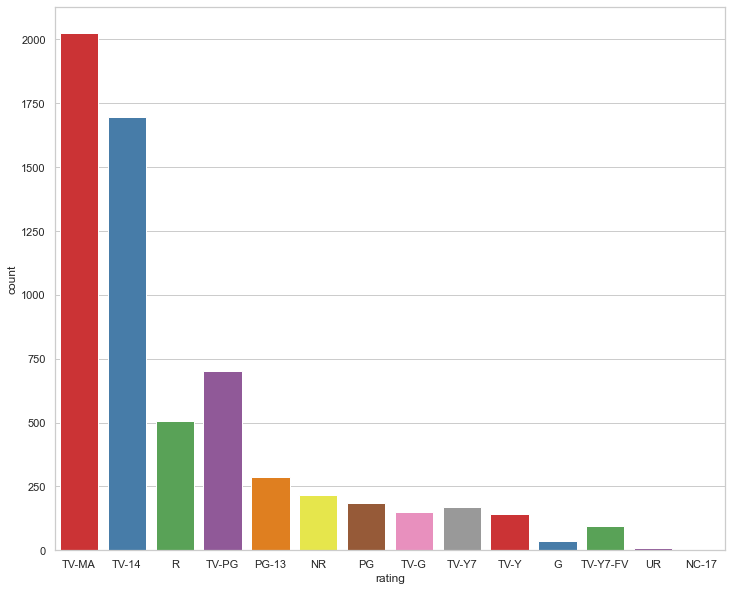

In [27]:
plt.figure(figsize=(12,10))
sns.set(style="whitegrid")
ax = sns.countplot(x="rating", data=netflix_tittles, palette="Set1", order=netflix_movies['rating'].value_counts().index[0:15])

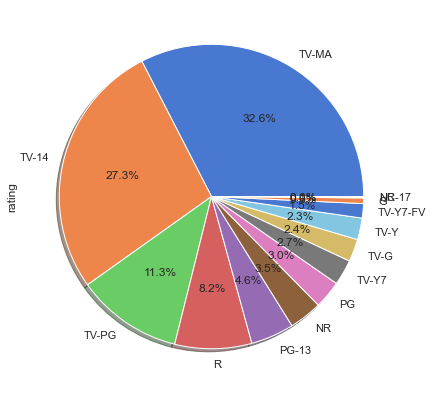

In [39]:
#Another way to count shows and movies rating as a percent of total content rating

netflix_tittles['rating'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(17,7))

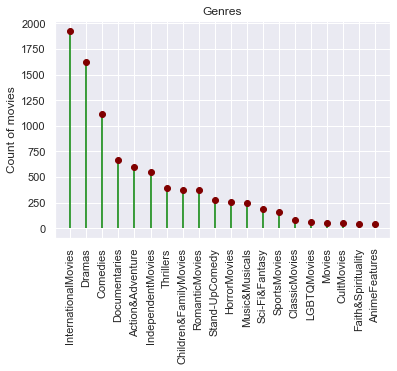

<Figure size 720x720 with 0 Axes>

In [34]:
genres=list(netflix_movies['listed_in'])
gen=[]

for i in genres:
    i=list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))

g=Counter(gen)
g={k: v for k, v in sorted(g.items(), key=lambda item: item[1], reverse= True)}


fig, ax = plt.subplots()

fig = plt.figure(figsize = (10, 10))
x=list(g.keys())
y=list(g.values())
ax.vlines(x, ymin=0, ymax=y, color='green')
ax.plot(x,y, "o", color='maroon')
ax.set_xticklabels(x, rotation = 90)
ax.set_ylabel("Count of movies")
# set a title
ax.set_title("Genres");